<div id="custom-header" style="padding: 0px; color: white; margin: 0; font-size: 22px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 10px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b>  Importing Libraries </b>
</div>

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
from pprint import PrettyPrinter
from datetime import datetime, time

#Data visualization libraries
import seaborn as sns
sns.set()
import plotly.express as px
import matplotlib.pyplot as plt

#Machine learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
#Ignore FutureWarnings to avoid clutter in the output
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

#Initialize PrettyPrinter for neat printing
pp = PrettyPrinter(indent=2)

In [2]:
#Set the maximum number of displayed columns for Pandas DataFrames to 'None' (display all columns)
pd.set_option('display.max_columns', None)
#Set the maximum number of displayed rows for Pandas DataFrames to 30
pd.set_option('display.max_rows', 30)

<div id="custom-header" style="padding: 0px; color: white; margin: 0; font-size: 22px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 10px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b>  Loading Dataset </b>
</div>

In [3]:
#Read the original CSV file into a DataFrame
df_original = pd.read_csv(r"D:\Projects\task_4\anomaly_detection_dataset.csv")

#Create a copy of the original DataFrame to work with
df = df_original.copy()

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

- The DataFrame 'df' is now a copy of the original DataFrame, allowing us to perform operations on it without modifying the original data.
- Any changes made to 'df' will not impact 'df_original.'
- At this point, we have the flexibility to explore and analyze the DataFrame 'df' further, conduct data preprocessing, or use it for modeling purposes.
- If changes are made to 'df' and there's a need to revert to the original data, it's possible to refer back to 'df_origial.'


<div id="custom-header" style="padding: 0px; color: white; margin: 0; font-size: 22px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 10px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b>  Data Exploration & Preparation </b>
</div>

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> Initial Inspection</div> 

In [4]:
#View first 5 rows
df.head()

,transaction_id,user_id,transaction_amount,transaction_count_day,device_type,location,account_age_days,is_international
0,10001,1051,390.39,5,Mobile,USA,1178,0
1,10002,1092,308.01,2,Mobile,Germany,1098,1
2,10003,1014,464.39,3,Tablet,UK,1280,0
3,10004,1071,780.80,7,Web,Germany,744,0
4,10005,1060,497.08,3,Mobile,Germany,1000,1


In [5]:
#dataset shape
df.shape

(500, 8)

In [6]:
#data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction_id         500 non-null    int64  
 1   user_id                500 non-null    int64  
 2   transaction_amount     500 non-null    float64
 3   transaction_count_day  500 non-null    int64  
 4   device_type            500 non-null    object 
 5   location               500 non-null    object 
 6   account_age_days       500 non-null    int64  
 7   is_international       500 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 31.4+ KB


In [7]:
#null counts
df.isnull().sum()

transaction_id           0
user_id                  0
transaction_amount       0
transaction_count_day    0
device_type              0
location                 0
account_age_days         0
is_international         0
dtype: int64

In [8]:
#count of duplicate rows
df.duplicated().sum()

np.int64(0)

In [9]:
#statistical summary (numerical columns)
df.describe()

,transaction_id,user_id,transaction_amount,transaction_count_day,account_age_days,is_international
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,10250.500000,1048.87400,722.550600,3.678000,764.654000,0.184000
std,144.481833,29.56983,1197.413085,3.882327,420.106283,0.387872
min,10001.000000,1000.00000,88.860000,0.000000,14.000000,0.000000
25%,10125.750000,1023.00000,406.080000,2.000000,412.250000,0.000000
50%,10250.500000,1050.00000,504.395000,3.000000,773.000000,0.000000
75%,10375.250000,1072.25000,623.695000,4.000000,1132.750000,0.000000
max,10500.000000,1099.00000,9801.000000,28.000000,1495.000000,1.000000


In [10]:
#Display descriptive statistics for categorical (object) columns in the DataFrame
df.describe(include="O")

,device_type,location
count,500,500
unique,3,4
top,Mobile,Germany
freq,172,144


In [11]:
#Get the names of categorical columns in the DataFrame
categorical_columns=df.select_dtypes(include='O').columns
#Iterate over each categorical column in the DataFrame
for i in categorical_columns:
    #Print the unique values of the current categorical column
    print('Unique values of', i, set(df[i]))
    #Print the count of each unique value in the current categorical column
    print(df[i].value_counts())
    #Print a separator line for better readability
    print('-' * 50)

Unique values of device_type {'Web', 'Mobile', 'Tablet'}
device_type
Mobile    172
Tablet    164
Web       164
Name: count, dtype: int64
--------------------------------------------------
Unique values of location {'UK', 'USA', 'Germany', 'India'}
location
Germany    144
UK         130
USA        126
India      100
Name: count, dtype: int64
--------------------------------------------------


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;font-family: 'Times New Roman', Times, serif;text-align:left">
<h4 align="left"><font color=#254E58> Analysis of Data</font></h4>  
    
- The dataset contains 500 transaction records with 8 features.
- The data includes numerical, binary, and categorical attributes relevant to transaction behavior analysis.
- No missing or duplicate records were found in the dataset, indicating good data quality.
- Some numerical features show extreme maximum values compared to their medians, suggesting the presence of anomalous behavior.
    - Transaction_amount Mean: ~722 Max: 9801 (strong anomaly )
    - transaction_count_day :Max = 28 (very high vs median 3)
    - account_age_days Ranges from 14 to 1495 days

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> EDA </div> 

In [12]:
#Get the names of numerical columns in the DataFrame
numerical_columns=df.select_dtypes(include='number').columns
numerical_columns

Index(['transaction_id', 'user_id', 'transaction_amount',
       'transaction_count_day', 'account_age_days', 'is_international'],
      dtype='object')

In [13]:
numerical_columns=numerical_columns.drop('transaction_id')
numerical_columns=numerical_columns.drop('is_international')

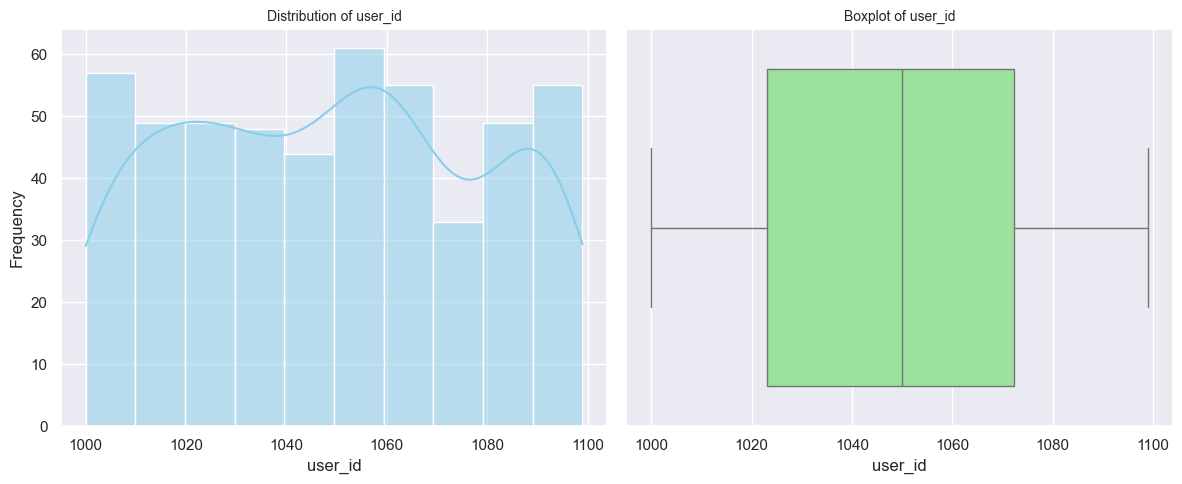

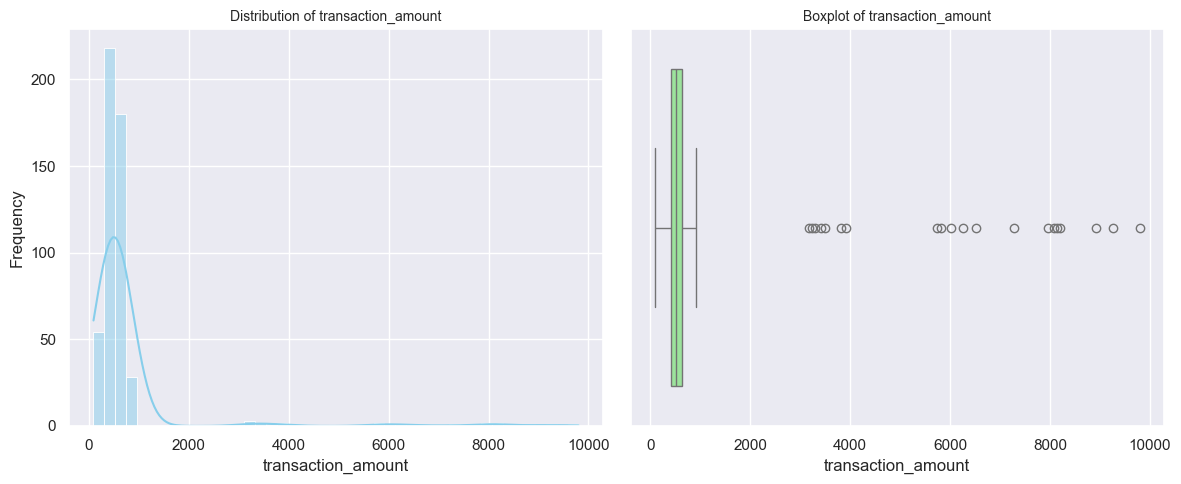

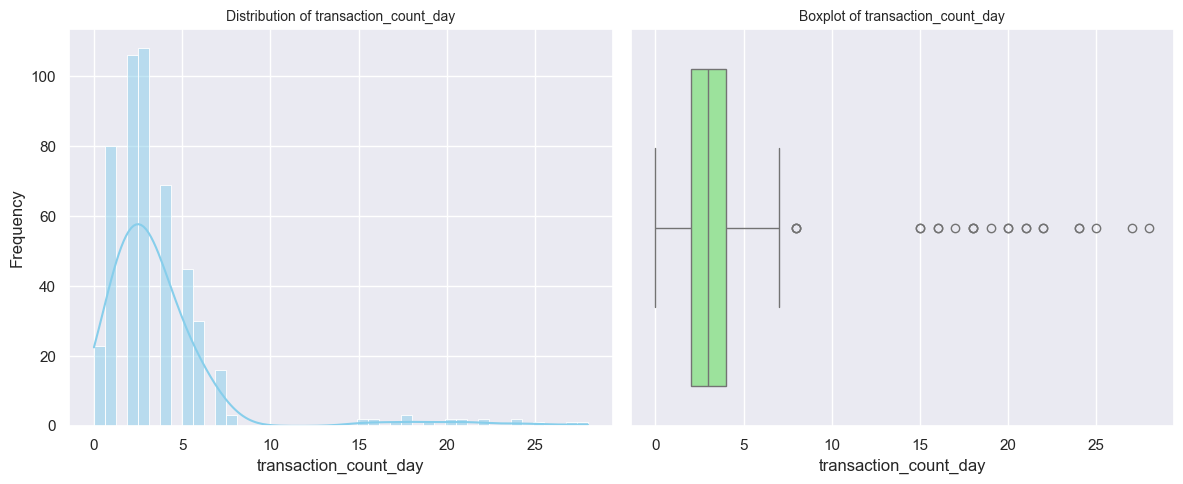

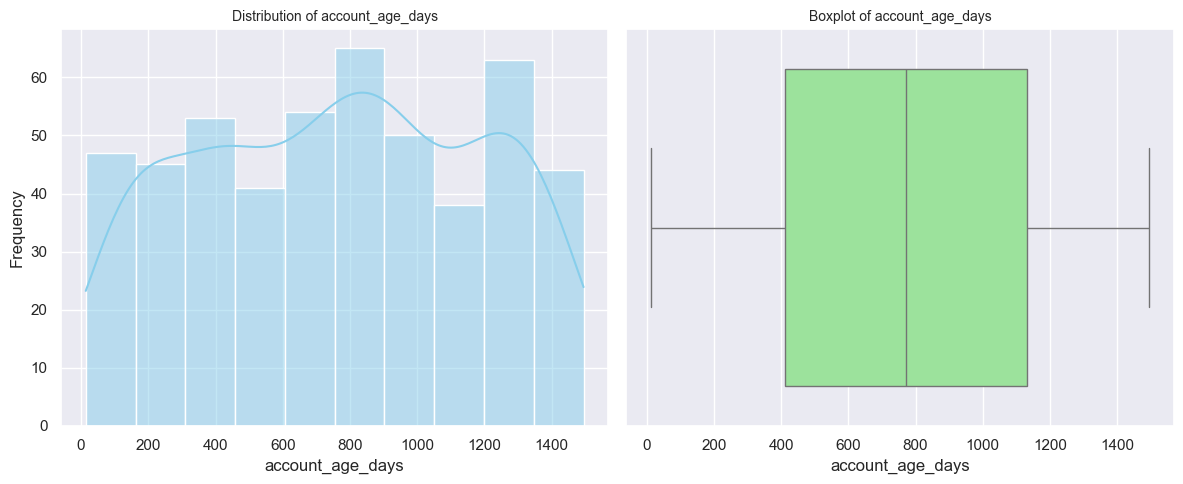

In [14]:
#Univariate Analysis 
for col in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12,5))
    
    #Histogram + KDE
    sns.histplot(df[col], kde=True, color="skyblue", ax=axes[0])
    axes[0].set_title(f"Distribution of {col}", fontsize=10)
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frequency")
    
    #Boxplot
    sns.boxplot(x=df[col], color="lightgreen", ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}", fontsize=10)
    
    plt.tight_layout()
    plt.show()


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;font-family: 'Times New Roman', Times, serif;text-align:left">
<h4 align="left"><font color=#254E58> EDA Insights</font></h4>  
    
- The distributions indicate right-skewed behavior, especially in transaction amount and transaction frequency.
- Boxplots clearly reveal extreme values in transaction amount and transaction frequency, validating the need for anomaly detection.

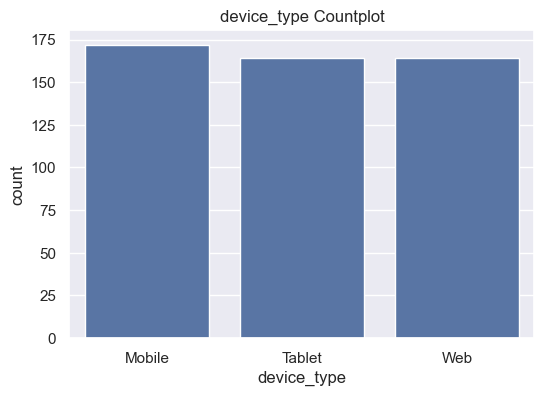

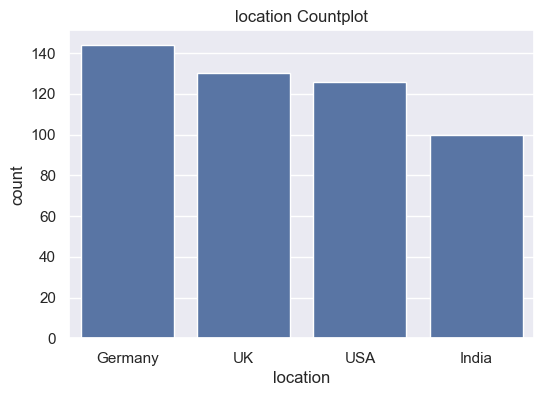

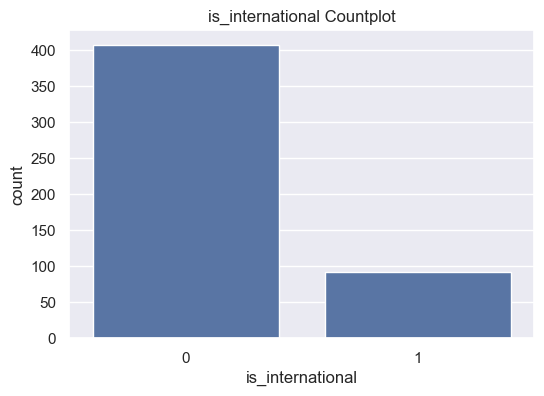

In [15]:
#Categorical features countplots
categorical_columns = categorical_columns.append(pd.Index(["is_international"]))
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'{col} Countplot')
    plt.show()

In [16]:
df_model = df.drop(columns=["transaction_id", "user_id"])

In [17]:
df_model.to_csv("cleaned_transactions.csv", index=False)


## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> Feature engineering & Encoding</div> 

In [18]:
#Feature engineering
df_model['amount_per_transaction'] = df_model['transaction_amount'] / (df_model['transaction_count_day'] + 1)
df_model['is_new_account'] = (df_model['account_age_days'] < 30).astype(int)

#Standardized deviation of transaction amount
df_model['amount_deviation'] = StandardScaler().fit_transform(df_model[['transaction_amount']])


In [19]:
df_model.sample(n=10)

,transaction_amount,transaction_count_day,device_type,location,account_age_days,is_international,amount_per_transaction,is_new_account,amount_deviation
390,380.13,1,Mobile,Germany,858,0,190.065000,0,-0.286253
462,429.63,1,Web,Germany,1421,0,214.815000,0,-0.244873
255,487.26,2,Web,India,758,0,162.420000,0,-0.196696
17,636.46,2,Mobile,India,981,0,212.153333,0,-0.071969
491,648.07,3,Web,Germany,742,0,162.017500,0,-0.062264
391,475.32,3,Mobile,India,505,1,118.830000,0,-0.206677
245,464.23,5,Mobile,Germany,909,1,77.371667,0,-0.215948
420,394.33,3,Tablet,USA,155,0,98.582500,0,-0.274383
426,447.40,3,Tablet,Germany,22,1,111.850000,1,-0.230018
363,515.01,4,Mobile,USA,683,1,103.002000,0,-0.173498


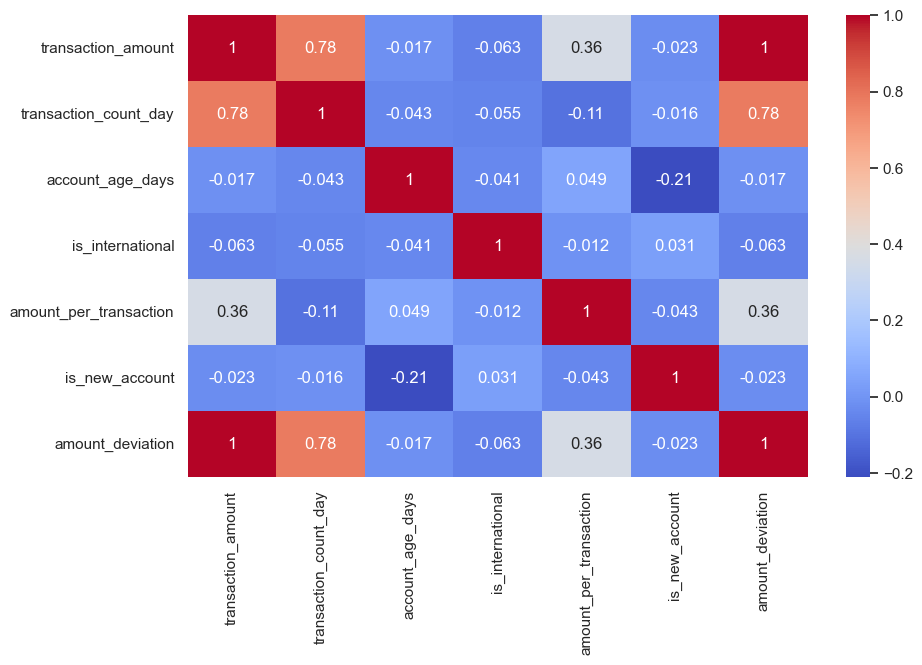

In [20]:
#Correlation Analysis
plt.figure(figsize=(10,6))
sns.heatmap(df_model.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.show()


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;font-family: 'Times New Roman', Times, serif;text-align:left">
<h4 align="left"><font color=#254E58> Correlation Insights</font></h4>  
    
- Weak to moderate correlations exist between features, indicating that anomaly detection should rely on multivariate patterns.


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%;font-family: 'Times New Roman', Times, serif; text-align:left">

<h3 align="lefAt"><font color=brown>Problem Framing:</font></h3>

1. **Problem Definition:**
   - In this dataset, an anomaly refers to a transaction whose behavior significantly deviates from normal user transaction patterns.Such anomalies may include:
        - Unusually high transaction amounts
        - Transactions from relatively new accounts with high value
        - International transactions that differ from common domestic behavior.
    - These anomalies may indicate suspicious, fraudulent, or rare transaction behavior and are not explicitly labeled in the dataset.

2. **Nature of the Problem**
   - The dataset does not contain predefined labels indicating normal or anomalous transactions.
   - Therefore, the problem is framed as an unsupervised anomaly detection task, where the goal is to identify rare and unusual patterns without prior examples of anomalies.

3. **Chosen Machine Learning Approach**
   - **Selected Model: Isolation Forest**
   - Isolation Forest is chosen as the anomaly detection model for this task.
       - **Why Isolation Forest Fits This Problem**
           - It works effectively in unsupervised settings where labeled anomalies are unavailable
           - It isolates anomalies based on how quickly data points can be separated, making it efficient for detecting rare behaviors
           - It performs well with numerical features such as transaction amount, transaction frequency, and account age
           - It scales efficiently and is robust to skewed data distributions and outliers

4. **Assumptions Made**
   - Anomalies constitute a small percentage of the total dataset
   - Most transactions represent normal user behavior
   - Extreme values across multiple features are more likely to be anomalous than isolated feature deviations

5. **Expected Output of the Model**
    - The model will assign an anomaly score to each transaction and classify records as either normal or anomalous based on learned behavioral patterns.
<br></div>

In [21]:
#Encode Categorical Features
df_encoded = pd.get_dummies(
    df_model,
    columns=['device_type', 'location'],
    drop_first=True
)


<div style="border-radius:5px;border:#254E58 solid;padding: 5px;background-color:white;font-size:110%;font-family: 'Times New Roman', Times, serif;text-align:left"><h4 align="left"><font color=#254E58></font></h4>  
  - Categorical variables were converted into numerical form using one-hot encoding to make them compatible with machine learning algorithms.

<div id="custom-header" style="padding: 0px; color: white; margin: 0; font-size: 22px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 10px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b>  Data Modelling </b>
</div>

In [22]:
#Copying df for further use
df1=df_model.copy()

In [23]:
#Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)
X_scaled.shape

(500, 12)

<div style="border-radius:5px;border:#254E58 solid;padding: 5px;background-color:white;font-size:110%;font-family: 'Times New Roman', Times, serif;text-align:left"><h4 align="left"><font color=#254E58></font></h4>  
  - Feature scaling was applied to ensure that variables with large numeric ranges do not dominate the anomaly detection process.

In [24]:
#Train Isolation Forest Model

iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.05,
    random_state=42
)

iso_forest.fit(X_scaled)


,"n_estimators n_estimators: int, default=100The number of base estimators in the ensemble.",100
,"max_samples max_samples: ""auto"", int or float, default=""auto""The number of samples to draw from X to train each base estimator.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` samples.- If ""auto"", then `max_samples=min(256, n_samples)`.If max_samples is larger than the number of samples provided,all samples will be used for all trees (no sampling).",'auto'
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. Used when fitting to define the thresholdon the scores of the samples.- If 'auto', the threshold is determined as in the original paper.- If float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",0.05
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator.- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.Note: using a float number less than 1.0 or integer less than number offeatures will enable feature subsampling and leads to a longer runtime.",1.0
,"bootstrap bootstrap: bool, default=FalseIf True, individual trees are fit on random subsets of the trainingdata sampled with replacement. If False, sampling without replacementis performed.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for :meth:`fit`. ``None`` means 1unless in a :obj:`joblib.parallel_backend` context. ``-1`` means usingall processors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo-randomness of the selection of the featureand split values for each branching step and each tree in the forest.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity of the tree building process.",0
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fit a wholenew forest. See :term:`the Glossary `... versionadded:: 0.21",False


<div style="border-radius:5px;border:#254E58 solid;padding: 5px;background-color:white;font-size:110%;font-family: 'Times New Roman', Times, serif;text-align:left"><h4 align="left"><font color=#254E58></font></h4>  
  - An Isolation Forest model was trained assuming approximately 5% of transactions are anomalous.

In [25]:
#Generate Anomaly Predictions
df1['anomaly_label'] = iso_forest.predict(X_scaled)
df1['anomaly_score'] = iso_forest.decision_function(X_scaled)
df1.head()

,transaction_amount,transaction_count_day,device_type,location,account_age_days,is_international,amount_per_transaction,is_new_account,amount_deviation,anomaly_label,anomaly_score
0,390.39,5,Mobile,USA,1178,0,65.0650,0,-0.277676,1,0.145597
1,308.01,2,Mobile,Germany,1098,1,102.6700,0,-0.346544,1,0.113304
2,464.39,3,Tablet,UK,1280,0,116.0975,0,-0.215815,1,0.141643
3,780.80,7,Web,Germany,744,0,97.6000,0,0.048695,1,0.122164
4,497.08,3,Mobile,Germany,1000,1,124.2700,0,-0.188487,1,0.141659


In [26]:
#Convert Labels to Business-Friendly Format
df1['anomaly_label'] = df1['anomaly_label'].map({1: 'Normal', -1: 'Anomaly'})


In [27]:
#Check Anomaly Count
df1['anomaly_label'].value_counts()


anomaly_label
Normal     475
Anomaly     25
Name: count, dtype: int64

<div style="border-radius:5px;border:#254E58 solid;padding: 5px;background-color:white;font-size:110%;font-family: 'Times New Roman', Times, serif;text-align:left"><h4 align="left"><font color=#254E58></font></h4>  
  - The model identified a small subset of transactions as anomalous, consistent with the assumed contamination rate.

In [28]:
#Save Model Output
df1.to_csv("anomaly_predictions.csv", index=False)

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> Visual Inspection of Anomalies</div> 

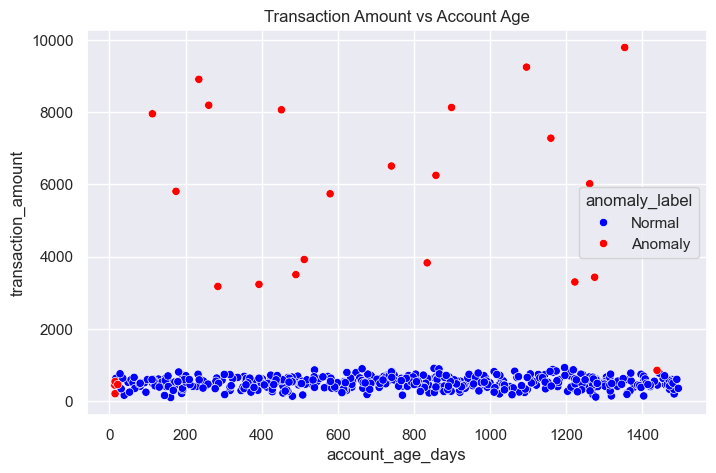

In [29]:
#Transaction Amount vs Account Age
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df1,
    x='account_age_days',
    y='transaction_amount',
    hue='anomaly_label',
    palette={'Normal': 'blue', 'Anomaly': 'red'}
)
plt.title("Transaction Amount vs Account Age")
plt.show()


<div style="border-radius:5px;border:#254E58 solid;padding: 5px;background-color:white;font-size:110%;font-family: 'Times New Roman', Times, serif;text-align:left"><h4 align="left"><font color=#254E58></font></h4>  
  - Anomalies tend to appear as high-value transactions and transactions from relatively new accounts.

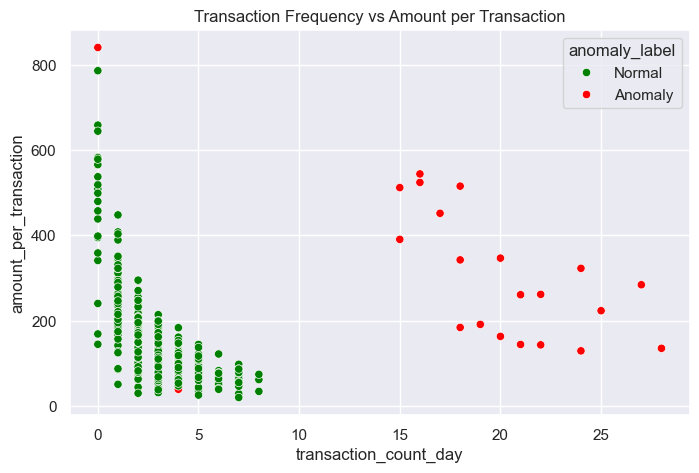

In [30]:
#Transaction Frequency vs Amount per Transaction
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df1,
    x='transaction_count_day',
    y='amount_per_transaction',
    hue='anomaly_label',
    palette={'Normal': 'green', 'Anomaly': 'red'}
)
plt.title("Transaction Frequency vs Amount per Transaction")
plt.show()


<div style="border-radius:5px;border:#254E58 solid;padding: 5px;background-color:white;font-size:110%;font-family: 'Times New Roman', Times, serif;text-align:left"><h4 align="left"><font color=#254E58></font></h4>  
  - Transactions with unusually high value per transaction or excessive daily frequency are flagged as anomalous.

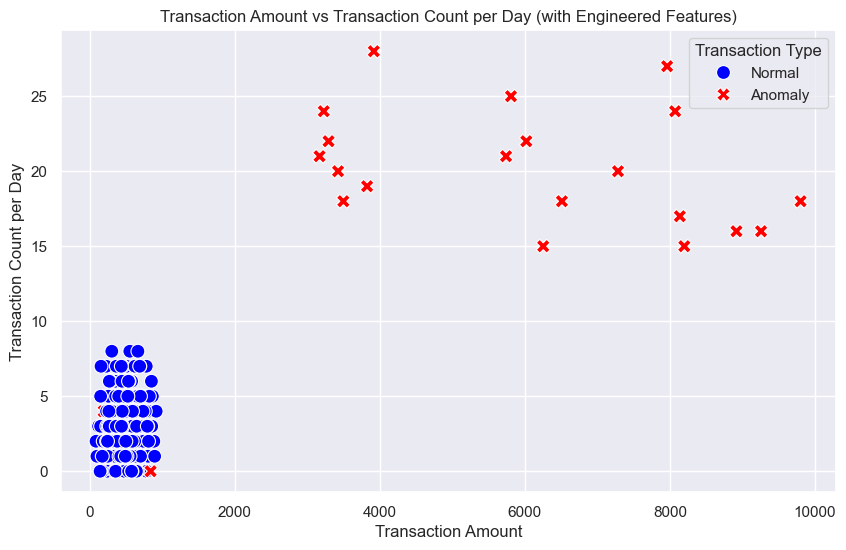

In [31]:
#Transaction Amount vs Transaction Count per Day
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='transaction_amount', y='transaction_count_day', 
                hue='anomaly_label', style='anomaly_label', s=100, palette=['blue', 'red'])
plt.title('Transaction Amount vs Transaction Count per Day (with Engineered Features)')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Count per Day')
plt.legend(title='Transaction Type')
plt.show()

<div style="border-radius:5px;border:#254E58 solid;padding: 5px;background-color:white;font-size:110%;font-family: 'Times New Roman', Times, serif;text-align:left"><h4 align="left"><font color=#254E58></font></h4>  
  - High Transactions amount with u excessive daily frequency are flagged as anomalous.

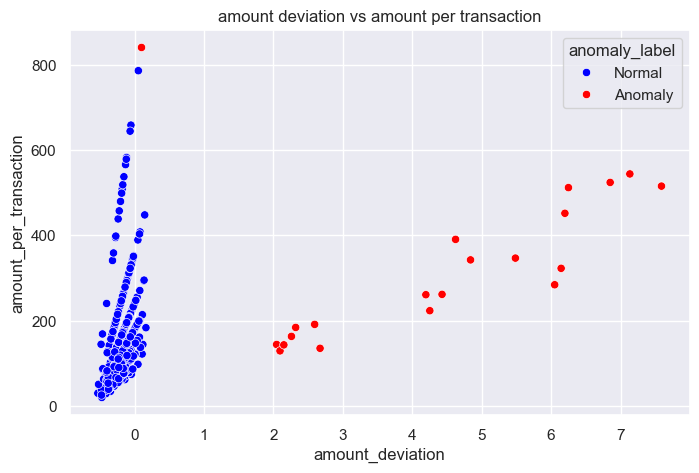

In [32]:
#Amount Deviation vs Amount per transaction
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df1,
    x='amount_deviation',
    y='amount_per_transaction',
    hue='anomaly_label',
    palette={'Normal': 'blue', 'Anomaly': 'red'}
)
plt.title("amount deviation vs amount per transaction")
plt.show()


<div style="border-radius:5px;border:#254E58 solid;padding: 5px;background-color:white;font-size:110%;font-family: 'Times New Roman', Times, serif;text-align:left"><h4 align="left"><font color=#254E58></font></h4>  
  - High anomaly detection for higher amount deviation

In [33]:
#Statistical Comparison (Normal vs Anomaly)
df1.groupby('anomaly_label')[
    ['transaction_amount', 'transaction_count_day', 'account_age_days']
].mean()


,transaction_amount,transaction_count_day,account_age_days
anomaly_label,,,
Anomaly,4990.602400,16.720000,628.160000
Normal,497.916295,2.991579,771.837895


<div style="border-radius:5px;border:#254E58 solid;padding: 5px;background-color:white;font-size:110%;font-family: 'Times New Roman', Times, serif;text-align:left"><h4 align="left"><font color=#254E58></font></h4>  
  - Anomalous transactions exhibit significantly higher transaction amounts and lower account age compared to normal transactions.

In [34]:
pd.crosstab(df1['is_international'], df1['anomaly_label'], normalize='index')


anomaly_label,Anomaly,Normal
is_international,,
0,0.053922,0.946078
1,0.032609,0.967391


In [35]:
df[
    (df1['anomaly_label'] == 'Anomaly') &
    (df1['transaction_amount'] < df1['transaction_amount'].quantile(0.75))
].head()


,transaction_id,user_id,transaction_amount,transaction_count_day,device_type,location,account_age_days,is_international
84,10085,1061,194.44,4,Mobile,UK,15,0
335,10336,1066,433.30,2,Tablet,Germany,14,1
407,10408,1042,530.56,3,Web,India,15,0
426,10427,1015,447.40,3,Tablet,Germany,22,1


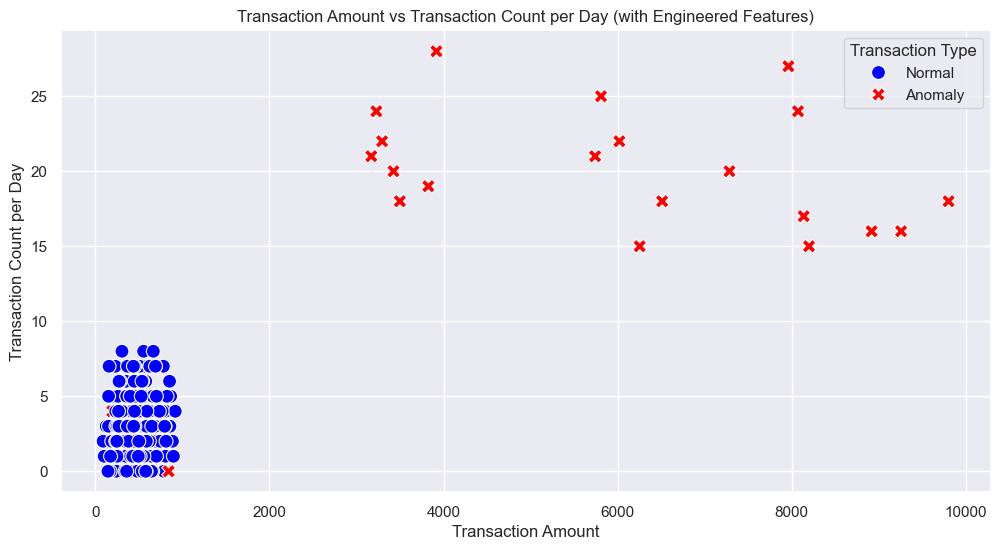

In [36]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df1, x='transaction_amount', y='transaction_count_day', 
                hue='anomaly_label', style='anomaly_label', s=100, palette=['blue', 'red'])
plt.title('Transaction Amount vs Transaction Count per Day (with Engineered Features)')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Count per Day')
plt.legend(title='Transaction Type')
plt.show()

<div style="border-radius:5px;border:#254E58 solid;padding: 5px;background-color:white;font-size:110%;font-family: 'Times New Roman', Times, serif;text-align:left"><h4 align="left"><font color=#254E58></font>Model Limitations</h4>  
   
    - The model assumes anomalies are rare and may misclassify legitimate high-value customers
    - No labeled data is available to quantitatively measure accuracy
    - Isolation Forest sensitivity depends on the chosen contamination parameter
    - Contextual factors such as user intent are not captured

<div style="border-radius:5px;border:#254E58 solid;padding: 5px;background-color:white;font-size:110%;font-family: 'Times New Roman', Times, serif;text-align:left"><h4 align="left"><font color=#254E58></font>Evaluation Summary</h4>  
   
    - The Isolation Forest successfully identified transactions with extreme values and unusual behavior patterns
    - Visual inspection confirms that anomalies differ clearly from normal transactions across key features
    - Statistical analysis supports that anomalous transactions are higher in value and frequency
    - Some false positives are expected due to the unsupervised nature of the model
    - Overall, the model provides meaningful insights suitable for risk screening and further investigation

In [37]:
df1.groupby('anomaly_label')[
    [
        'transaction_amount',
        'transaction_count_day',
        'amount_per_transaction',
        'account_age_days',
        'is_international',
        'is_new_account'
    ]
].mean()


,transaction_amount,transaction_count_day,amount_per_transaction,account_age_days,is_international,is_new_account
anomaly_label,,,,,,
Anomaly,4990.602400,16.720000,293.683931,628.160000,0.120000,0.160000
Normal,497.916295,2.991579,157.999521,771.837895,0.187368,0.006316


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: #F0E68C; font-size:100%;font-family: 'Times New Roman', Times, serif; text-align:left">

<h3 align="left"><font color=brown>Technical Insights & Observed Patterns:</font></h3>

1. **Key Indicators of Anomalous Behavior:**
   - **Transaction Amount:** Anomalies are characterized by significantly higher amounts (up to $9,801$) compared to normal transactions  (mostly under $900$). Extreme deviations in amount are a primary detection driver.
   - **Transaction Frequency:** Anomalous users exhibit unusually high daily transaction counts, with some executing up to 28 transactions in a single day, deviating sharply from typical usage patterns.
   - **User & Account Profile:** While both new and older accounts are present, high-value transactions originating from **new or recently created accounts** are frequently flagged. 
   

2. **Consolidated Behavioral Patterns:**
   - Large transactions concentrated among specific users and locations.
   - Users with multiple high-value transactions in a single day are strong candidates for investigation.
   - Anomalies often involve unusual combinations of device type and geographic location.

</div>

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: #F0E68C; font-size:100%;font-family: 'Times New Roman', Times, serif; text-align:left">

<h3 align="left"><font color=brown>Business Interpretation & Recommendations:</font></h3>

**Business Interpretation:**
The detected anomalies represent transactions that significantly deviate from standard customer behavior. These deviations may correspond to:
- Potential fraud attempts or account takeover activities.
- Misuse of newly created accounts.
- Legitimate but high-risk customer behavior requiring manual verification.

**Actionable Business Recommendations:**
1. **Transaction Monitoring:**
   - Implement real-time alerts for transactions exceeding a dynamic threshold (e.g., 3x the mean user transaction amount).
   - Flag users with unusually high daily transaction counts for immediate review.

2. **Risk-Based Segmentation & Review:**
   - **Prioritize manual review** for high-value transactions from new accounts.
   - Apply **stricter verification** for international transactions exceeding normal user thresholds.
   - Focus investigations on anomalies stemming from unusual device/location combinations.

3. **System Enhancement:**
   - Use the anomaly score as a **risk-ranking mechanism** to prioritize reviews, not as a hard decision rule.
   - **Combine** the unsupervised Isolation Forest model with a rule-based system (e.g., for threshold checks) to improve precision and interpretability.

</div>

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: #F0E68C; font-size:100%;font-family: 'Times New Roman', Times, serif; text-align:left">

<h3 align="left"><font color=brown>Strategic Next Steps & Model Improvements:</font></h3>

**Immediate Next Steps:**
- Conduct a detailed, ground-truth investigation on the top-ranked anomalies to validate fraud risk and refine the model's understanding.
- Collect additional features (e.g., transaction time of day, merchant category, historical user velocity) to improve detection capabilities.

**Future Model & Data Improvements:**
1. **Feature Engineering:**
   - Incorporate **time-based features** (e.g., time since last transaction, transaction hour).
   - Add **aggregated historical user behavior** features (e.g., 7-day rolling average amount).

2. **Model Evolution:**
   - Experiment with alternative or hybrid models (e.g., **One-Class SVM, Autoencoders**) and compare performance.
   - Move towards a **semi-supervised** approach by collecting labels on investigated anomalies for model retraining.
   - Implement **dynamic tuning** of the model's contamination rate based on seasonal trends and business risk tolerance.
   - Establish a pipeline for **continuous retraining** to adapt to evolving user behavior and fraud tactics.

</div>

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: #F0E68C; font-size:100%;font-family: 'Times New Roman', Times, serif; text-align:left">

<h3 align="left"><font color=brown>Final Insight Summary:</font></h3>

This project demonstrates the effectiveness of **unsupervised anomaly detection** in identifying unusual transaction behavior within an unlabeled dataset. Through exploratory analysis and Isolation Forest modeling, the system successfully isolates transactions that significantly deviate from normal patterns based on key indicators: **transaction amount, frequency, account age, and international activity**.

The findings provide a scalable, interpretable framework for **risk screening and prioritization**. While not all anomalies are fraudulent, this approach serves as a powerful **early-warning mechanism**, enabling fraud teams to focus investigative resources efficiently. The recommended path forward combines this robust anomaly detection foundation with rule-based checks and continuous model refinement to enhance precision and adapt to the dynamic nature of financial fraud.

</div>